# Iris Analytics AI Coding Challenge
## Intro
Hello, and thank you for interviewing with us! At Iris Analytics, we're on a mission to provide companies and researchers with the best data science talent the world can offer. Our platform seeks to enable data science collaboration on a global scale, handled by our marketplace. To do this, we have to ensure that we only take the best and brightest. That means you!

## Challenge
This challenge is focused on necessary data science skills like cleaning, exploration, and visualization. Because the Iris marketplace has you bid hours on tasks, this challenge will be timed. It is not recommended that you spend more than 2 hours on this challenge.This is to ensure that our data scientists get paid fairly and can perform the work in reasonable amounts of time.

### Timing
The timing is defined by the timestamp of your first edit (logged in the revision history) and the timestamp of your emailed solution notebook.

### Questions?
If you have any questions about the challenge, feel free to email cprinzz@gmail.com.

### Summary
Scores will be determined based on your completeness and accuracy first, and your time second. No revisions can be made after the submission. We will get back to you within 48 hours with your result. Good luck, and again, thank you for your interest in becoming an Iris Analytics data scientist!

## Amazon Alexa Review Dataset

The imported dataset contains reviews from the Amazon Alexa. The goal of this challenge is to clean, explore, and visualize this data to create a sentiment analysis model to predict the rating based on the review text. Let's get started.

In [1]:
# Standard imports. You can import any other packages needed. You can install
# additional packages by using:
# !pip install pandas
import pandas as pd
import matplotlib

# Fetch dataset
df = pd.read_csv('https://s3-us-west-2.amazonaws.com/patchworks-coding-challenge/amazon_alexa.tsv', sep='\t')
df.shape

(3150, 5)

## Cleaning

It's been discovered that all verified_reviews that are only say "love it" or are only one word are actually fake. Reviews like "great!" or "Love It!" need to be removed from the dataset.

In the cell below, remove one word and "love it" reviews from the dataset.

In [2]:
df = df[df['verified_reviews'].str.split().str.len()>4]

## Visualization

In the cells below:
1.   Create a bar graph showing the number of reviews per day from the date of the first review to the date of the last review
2.   Create a histogram of ratings

All graphs must have labels for X and Y axes.



<BarContainer object of 75 artists>

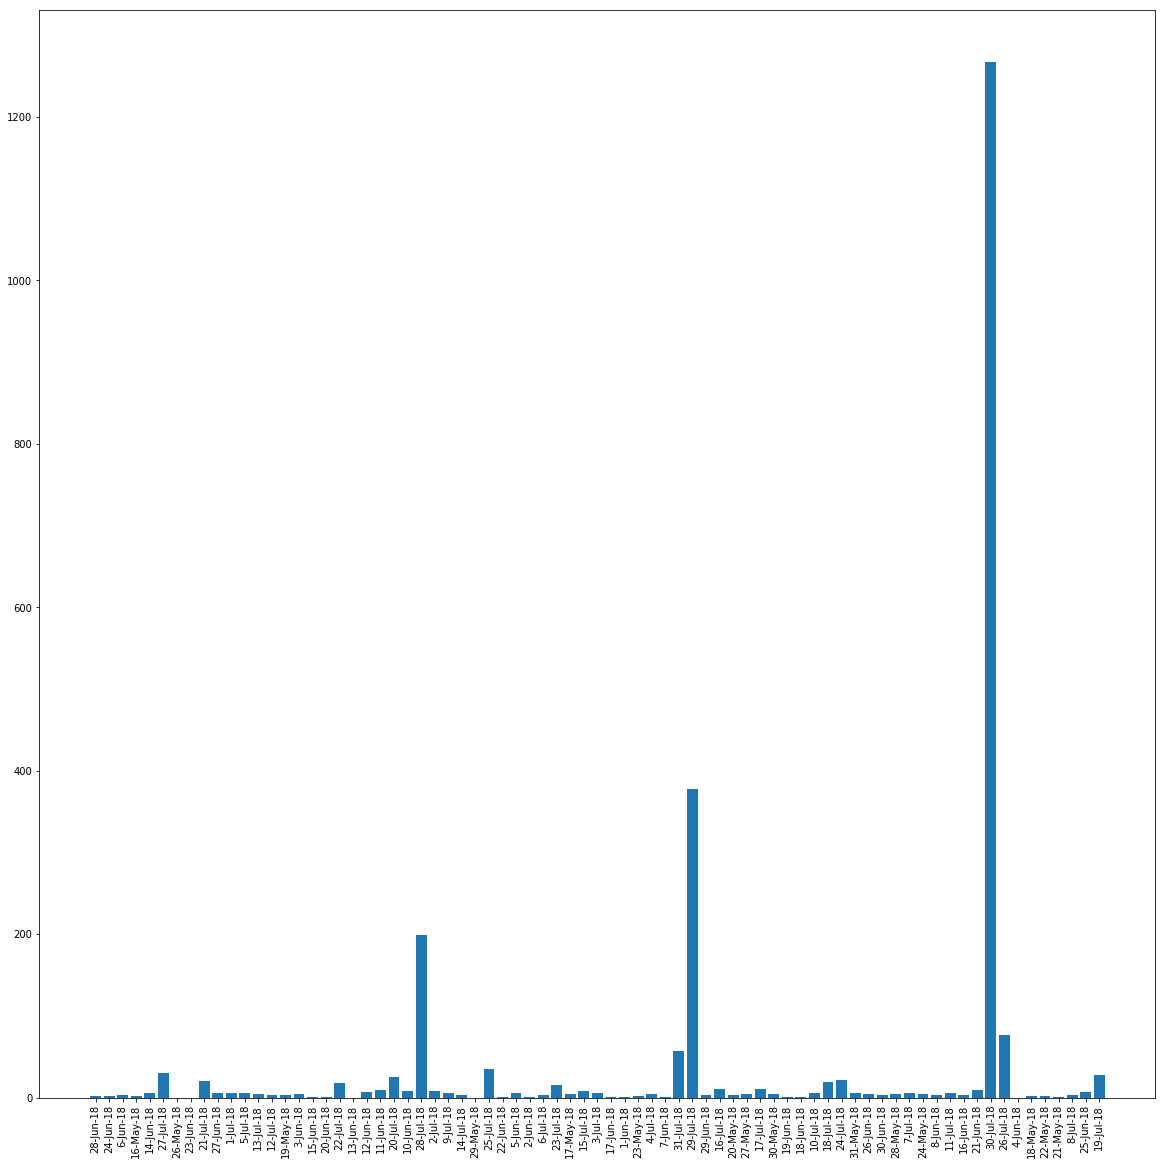

In [3]:
# Create a bar graph showing the number of reviews per day from the date of the
# first review to the date of the last review
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
data = df.copy()
data.set_index('rating',inplace=True)

l = {}

for i in df.index[:]:
    #print(data.iloc[rating]['date'])
    date = df.loc[i]['date']
    
    #print(date)
    if date not in l:
        l[date] = 0
    else:
        l[date] += 1

date_array = []
count = []
for key in l:
    date_array.append(key)
    count.append(l[key])
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
plt.bar(date_array,count)


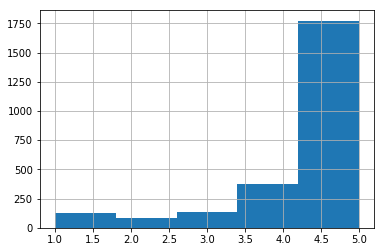

In [4]:
# Create a histogram of ratings
df['rating'].hist(bins=5)

## Exploration and Feature Engineering

Let's create some features for our model. Reminder: you are welcome to install and use any packages you wish.


1.   Create a new column called "verified_reviews_clean" that removes filler words from "verified_reviews" like "the", "a", "and", "I", etc. 
2.   Find the most common non-filler words for each rating score. Example:


```
Rating |ReviewsWith_love | ReviewsWith_laugh | ....
1               0                  1              
2               0                  2             
3               2                  1            
...

```

3.   Create dummy variables (1 or 0) for the presence of these words in each review.



In [5]:
# Create a new column called "verified_reviews_clean" that removes filler words
# from "verified_reviews" like "the", "a", "and", "I", etc.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
#filler = ["the","The","a","A","I"]
df['verified_reviews'] = df['verified_reviews'].str.lower()# Converting the words to the lower case.
df['verified_reviews_clean'] = df['verified_reviews'].apply(lambda x: ' '.join([word for word in x.split() if word
                                                                                not in stop]))
maxlen = max(df['verified_reviews_clean'].str.split(' ').str.len())

print("Maximum length of any reviews is of {} words".format(maxlen))
df.head()

[nltk_data] Downloading package stopwords to /home/justbj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Maximum length of any reviews is of 274 words


,rating,date,variation,verified_reviews,feedback,verified_reviews_clean
2,4,31-Jul-18,Walnut Finish,"sometimes while playing a game, you can answer...",1,"sometimes playing game, answer question correc..."
3,5,31-Jul-18,Charcoal Fabric,i have had a lot of fun with this thing. my 4 ...,1,"lot fun thing. 4 yr old learns dinosaurs, cont..."
5,5,31-Jul-18,Heather Gray Fabric,i received the echo as a gift. i needed anothe...,1,received echo gift. needed another bluetooth s...
6,3,31-Jul-18,Sandstone Fabric,"without having a cellphone, i cannot use many ...",1,"without cellphone, cannot use many features. i..."
7,5,31-Jul-18,Charcoal Fabric,i think this is the 5th one i've purchased. i'...,1,think 5th one i've purchased. i'm working gett...


In [6]:
# Find the most common non-filler words for each rating score. Example:
# Rating |ReviewsWith_love | ReviewsWith_laugh | ....
# 1               0                  1              
# 2               0                  2             
# 3               2                  1            
# ...
most_common = []
for rating in df['rating'].unique():
    text_df = df[df['rating']==rating]
    text = text_df['verified_reviews_clean'].values
    s = ""
    for line in text:
        s+=line
    freqd = nltk.FreqDist(s.split())
    print(freqd.most_common(5))
    
    

[('echo', 107), ('like', 86), ('alexa', 84), ('use', 81), ('great', 71)]
[('echo', 392), ('love', 299), ('alexa', 260), ('music', 250), ('great', 240)]
[('alexa', 40), ('echo', 36), ('get', 23), ('like', 22), ('amazon', 20)]
[('echo', 33), ('play', 22), ('like', 22), ('get', 20), ('would', 20)]
[('echo', 42), ('amazon', 29), ('would', 28), ('get', 21), ('one', 21)]


In [7]:
# Create dummy variables (1 or 0) for the presence of these words in each review.


#Two most common words is 'Echo' and 'Alexa'.
hasEcho = []
hasAlexa = []
for i in df.index[:]:
    #print(df.loc[i]['verified_reviews_clean'].split())
    if 'echo' in df.loc[i]['verified_reviews_clean'].split():
        hasEcho.append(1)
    else:
        hasEcho.append(0)
    
    if 'alexa' in df.loc[i]['verified_reviews_clean'].split():
        hasAlexa.append(1)
    else:
        hasAlexa.append(0)
    
df['Reviewswith_echo'] = hasEcho
df['Reviewswith_alexa'] = hasAlexa
df.head()

,rating,date,variation,verified_reviews,feedback,verified_reviews_clean,Reviewswith_echo,Reviewswith_alexa
2,4,31-Jul-18,Walnut Finish,"sometimes while playing a game, you can answer...",1,"sometimes playing game, answer question correc...",0,1
3,5,31-Jul-18,Charcoal Fabric,i have had a lot of fun with this thing. my 4 ...,1,"lot fun thing. 4 yr old learns dinosaurs, cont...",0,0
5,5,31-Jul-18,Heather Gray Fabric,i received the echo as a gift. i needed anothe...,1,received echo gift. needed another bluetooth s...,1,0
6,3,31-Jul-18,Sandstone Fabric,"without having a cellphone, i cannot use many ...",1,"without cellphone, cannot use many features. i...",0,0
7,5,31-Jul-18,Charcoal Fabric,i think this is the 5th one i've purchased. i'...,1,think 5th one i've purchased. i'm working gett...,0,0


## Prediction

Create a model using your new features to predict the rating score given the review.


1.   Split the dataset into a training and test set using the method of your choice.
2.   Create a column called "predicted_rating" and use the model of your choice to achieve the best accuracy possible. In the text cell, explain how you chose your model and loss function.



In [19]:
# Split the dataset into a training and test set using the method of your choice.
def convert_to_onehot(Y,C):
    Y = np.eye(C)[Y.reshape(-1)]
    return Y
rating_Onehot = convert_to_onehot(df['rating'].values-1,5)
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
max_features = 15000
max_len = 200
embed_size = 300
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(df['verified_reviews_clean'].values)
x = tokenizer.texts_to_sequences(df['verified_reviews_clean'].values)
x = sequence.pad_sequences(x,maxlen=max_len)
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(x,rating_Onehot,test_size=0.1,random_state=101)
#print(trainX[3],"\t",trainY[3])
testX.shape

(250, 200)

In [23]:
# Create a column called "predicted_rating" and use the model of your choice to achieve the best accuracy possible.
from keras.models import Model
from keras.layers import Dense, Input, Dropout, LSTM, Activation
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.initializers import glorot_uniform
from keras.layers import SpatialDropout1D, Flatten, K
from keras import regularizers

max_features = 15000
max_len = 200
embed_size = 300

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def Sent_model(max_len,max_features,trainX):
    #sentence_indices = Input(shape=input_shape,dtype='int32')
    input1 = Input(shape=(max_len,))
    
    embed_layer = Embedding(input_dim=max_features,output_dim=embed_size,input_length=trainX.shape[1])(input1)
    embed_layer = SpatialDropout1D(0.15)(embed_layer)
    
    x = LSTM(units=100,recurrent_dropout=0.5,dropout=0.3,return_sequences=True)(embed_layer)
    x = LSTM(units=100,return_sequences=False)(x)
    x = Dense(16,activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(16,activation='relu')(x)
    out = Dense(5,activation='softmax')(x)
    model = Model(inputs=input1, outputs=out)
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy',f1])
    return model
model = Sent_model(max_len,max_features,trainX)
model.summary()
    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 200)               0         
_________________________________________________________________
embedding_8 (Embedding)      (None, 200, 300)          4500000   
_________________________________________________________________
spatial_dropout1d_8 (Spatial (None, 200, 300)          0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 200, 100)          160400    
_________________________________________________________________
lstm_13 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_20 (Dense)             (None, 16)                1616      
_________________________________________________________________
dropout_7 (Dropout)          (None, 16)                0         
__________

In [24]:
batch_size = 16
n_epochs = 35
history = model.fit(trainX, trainY, batch_size=batch_size, epochs=n_epochs,validation_data=(testX, testY),verbose=1)

Train on 2241 samples, validate on 250 samples
Epoch 1/35
2241/2241 [==============================] - 67s 30ms/step - loss: 1.0182 - acc: 0.7046 - f1: 0.6212 - val_loss: 0.7641 - val_acc: 0.7440 - val_f1: 0.7631
Epoch 2/35
2241/2241 [==============================] - 55s 25ms/step - loss: 0.7431 - acc: 0.7233 - f1: 0.7411 - val_loss: 0.6819 - val_acc: 0.7360 - val_f1: 0.7699
Epoch 3/35
2241/2241 [==============================] - 55s 25ms/step - loss: 0.6237 - acc: 0.7532 - f1: 0.7673 - val_loss: 0.7441 - val_acc: 0.7560 - val_f1: 0.7723
Epoch 4/35
2241/2241 [==============================] - 55s 25ms/step - loss: 0.5622 - acc: 0.7800 - f1: 0.7837 - val_loss: 0.7898 - val_acc: 0.7240 - val_f1: 0.7558
Epoch 5/35
2241/2241 [==============================] - 55s 25ms/step - loss: 0.5054 - acc: 0.7992 - f1: 0.7963 - val_loss: 0.7822 - val_acc: 0.7440 - val_f1: 0.7199
Epoch 6/35
2241/2241 [==============================] - 55s 25ms/step - loss: 0.4530 - acc: 0.8300 - f1: 0.8218 - val_loss:

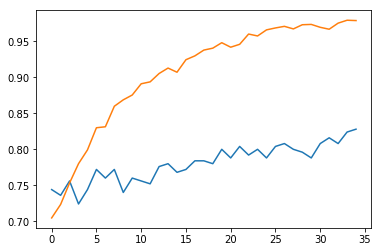

In [25]:
plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])

In [26]:
y_pred = model.predict(x,batch_size=12,verbose=1)
print(y_pred)
y_pred = np.argmax(y_pred,axis=1)

2491/2491 [==============================] - 17s 7ms/step
[[1.8029622e-08 1.2376286e-04 2.2480983e-04 9.9856430e-01 1.0871991e-03]
 [1.0402528e-22 1.8502962e-22 5.5685577e-24 3.0041781e-05 9.9996996e-01]
 [1.4298352e-23 3.8466631e-23 9.4394948e-25 2.2689614e-05 9.9997735e-01]
 ...
 [6.8035000e-23 8.2753080e-23 2.6087023e-24 2.0116049e-05 9.9997985e-01]
 [2.9517416e-24 5.4000838e-24 1.2707050e-25 1.2733358e-05 9.9998724e-01]
 [4.6087700e-25 7.0145990e-25 1.5167466e-26 7.0021151e-06 9.9999297e-01]]


In [27]:
df['predicted_rating'] = y_pred+1

In [28]:
#Results.
df.head()

,rating,date,variation,verified_reviews,feedback,verified_reviews_clean,Reviewswith_echo,Reviewswith_alexa,predicted_rating
2,4,31-Jul-18,Walnut Finish,"sometimes while playing a game, you can answer...",1,"sometimes playing game, answer question correc...",0,1,4
3,5,31-Jul-18,Charcoal Fabric,i have had a lot of fun with this thing. my 4 ...,1,"lot fun thing. 4 yr old learns dinosaurs, cont...",0,0,5
5,5,31-Jul-18,Heather Gray Fabric,i received the echo as a gift. i needed anothe...,1,received echo gift. needed another bluetooth s...,1,0,5
6,3,31-Jul-18,Sandstone Fabric,"without having a cellphone, i cannot use many ...",1,"without cellphone, cannot use many features. i...",0,0,3
7,5,31-Jul-18,Charcoal Fabric,i think this is the 5th one i've purchased. i'...,1,think 5th one i've purchased. i'm working gett...,0,0,5


### Explain how you chose your model and loss function.

### Model
- A simple 2 layer LSTM network(as for now I have a CPU system with 4GB RAM) with 50 neurons followed by a 2 hidden layers with 16 neurons each and finally a output layer that outputs the probabilities of each class using softmax activation.
- We also used a trainable embedding layer, with Spatial1D dropout to prevent overfitting.
- The hyperparameters are tuned on the basis of trial and error, and we used a batch_size of 16, total number of epochs 35 and embedding dimensions to be 300 as out suitable choice.
- As LSTM networks are prone to overfit so the number of LSTM neurons is small also,the hidden units after the LSTM network is kept small.
- I selected the test size to be 10% of the dataset.
### Loss Function
- The loss function I used is categorical Cross Entropy because we have 5 classes to predict and these classes are one-hot encoded.
- I used Accuracy and F1 score as metric to evaluate the model performance.


## Bonus Points
For bonus points, write a sentence or two about how you could further improve your model. This is not required.

- Collect More reviews as in our dataset.
- A few more changes can be adopted to improve the accuracy like we can use a capsule network(which is pretty hard to train on a CPU) which have shown great results in sentiment analysis researches.
- As the dataset is small so training embeddings from scratch is not good enough, so we can use a better pretrained embedding like Glove or Word2Vec to get more relations among the words.
- Adding BatchNormalization can further add more parameters but BatchNormalization have shown good results than models without BatchNormailzation.
- Punctuations should be removed because they do not add much information for the predictions.
- We can also take into consideration the Emojis like :),:(, etc. in account for sentiment analysis models.
- Stemming and Lemmatisation can be applied to make the vocab size small and it wont have much difference in the model performance.

## Conclusion
Thanks for completing the Iris Analytics Data Science Challenge! Submit your notebook to cprinzz@gmail.com for review. We'll get back to you within 48 hours with your results. You can download your notebook by clicking File > Download .ipynb.